In [67]:
import pyarrow.feather as feather
import pandas as pd
from datetime import datetime
import numpy as np
import math
import time
import os
from os import listdir
from os.path import isfile, join
from scipy import stats

import sklearn.gaussian_process as gp
import matplotlib.pyplot as plt

In [68]:
def get_files():
    model = ['gp_', 'xgboost_']
    split = ['2_weeks_', 'station_']
    additional_feature = ['', 'in_out_']
    datashape = ['', 'single_field_']
    metric = ['accuracy', 'mse']

    # Get all crossval files
    unfiltered_files = [f for f in listdir('results/') if isfile(join('results/', f))]
    # Filter old files
    file_names = [x for x in unfiltered_files if 'old' not in x]

    dfs = []
    for file_name in file_names:
        df = feather.read_feather('results/'+file_name)
        dfs.append(df)
        
    return dfs, file_names

# For each trained model average the performance over all other testing sets (average the column)
def calculate_average_per_trained(df):
    columns = df.columns.to_list()
    del columns[0]
    del columns[-1]
    
    averages = []
    for index, col in enumerate(columns):
        lst = df[col].to_numpy()
        np.delete(lst, index)
        averages.append(np.mean(lst))
        
    return [i for i in averages]
    
# Create get average performance  
def get_averages(dfs):
    averages_list = []
    for df in dfs:
        averages_list.append(calculate_average_per_trained(df))
    return averages_list

# Two tailed t-test
def ttest(list_1, list_2):
    return stats.ttest_ind(list_1, list_2, alternative='two-sided')[1]

def average(lst):
    return sum(lst)/len(lst)


## model comparisons

0,1 gp_2_weeks & 12, 13 xgboost_2_weeks

2,3 gp_2_weeks_in_out_single_field & 14,15 xgboost_2_weeks_in_out_single_field

4,5 gp_2_weeks_single_field & 16,17 xgboost_2_weeks_single_field

6,7 gp_station & 18,19 xgboost_station

8,9 gp_station_in_out_single_field & 20,21 xgboost_station_in_out_single_field

10,11 gp_station_single_field & 22, 23 xgboost_station_single_field


## in-out comparisons

2,3 gp_2_weeks_in_out_single_field & 4,5 gp_2_weeks_single_field

8,9 gp_station_in_out_single_field & 10,11 gp_station_single_field

14,15 xgboost_2_weeks_in_out_single_field & 16,17 xgboost_2_weeks_single_field

20,21 xgboost_station_in_out_single_field & 22, 23 xgboost_station_single_field


## temporal training comparisons

2,3 gp_2_weeks_in_out_single_field & 8,9 gp_station_in_out_single_field

4,5 gp_2_weeks_single_field & 10,11 gp_station_single_field

14,15 xgboost_2_weeks_in_out_single_field & 20,21 xgboost_station_in_out_single_field

16,17 xgboost_2_weeks_single_field & 22, 23 xgboost_station_single_field


## spatial training comparisons

0,1 gp_2_weeks & 6,7 gp_station

12, 13 xgboost_2_weeks & 18,19 xgboost_station


## temporal-spatial comparisons

0,1 gp_2_weeks & 4,5 gp_2_weeks_single_field

6,7 gp_station & 10,11 gp_station_single_field

12, 13 xgboost_2_weeks & 16,17 xgboost_2_weeks_single_field

18,19 xgboost_station & 22, 23 xgboost_station_single_field

In [100]:
print(average(averages_list[18]), average(averages_list[22]))

0.8201954044804962 0.7176093855229935


In [69]:
dfs, file_names = get_files()
averages_list = get_averages(dfs)

for index, avg in enumerate(averages_list):
    print(index, file_names[index])

0 gp_2_weeks_crossval_accuracy.feather
1 gp_2_weeks_crossval_mse.feather
2 gp_2_weeks_in_out_single_field_crossval_accuracy.feather
3 gp_2_weeks_in_out_single_field_crossval_mse.feather
4 gp_2_weeks_single_field_crossval_accuracy.feather
5 gp_2_weeks_single_field_crossval_mse.feather
6 gp_station_crossval_accuracy.feather
7 gp_station_crossval_mse.feather
8 gp_station_in_out_single_field_crossval_accuracy.feather
9 gp_station_in_out_single_field_crossval_mse.feather
10 gp_station_single_field_crossval_accuracy.feather
11 gp_station_single_field_crossval_mse.feather
12 xgboost_2_weeks_crossval_accuracy.feather
13 xgboost_2_weeks_crossval_mse.feather
14 xgboost_2_weeks_in_out_single_field_crossval_accuracy.feather
15 xgboost_2_weeks_in_out_single_field_crossval_mse.feather
16 xgboost_2_weeks_single_field_crossval_accuracy.feather
17 xgboost_2_weeks_single_field_crossval_mse.feather
18 xgboost_station_crossval_accuracy.feather
19 xgboost_station_crossval_mse.feather
20 xgboost_station_in_

In [70]:
dfs[0]

,index,trained_on_0,trained_on_1,trained_on_2,trained_on_3,trained_on_4,trained_on_5,trained_on_6,trained_on_7,trained_on_8,...,trained_on_17,trained_on_18,trained_on_19,trained_on_20,trained_on_21,trained_on_22,trained_on_23,trained_on_24,trained_on_25,dead_space
0,tested_on_0,0.991518,0.898056,0.897897,0.897897,0.897897,0.897897,0.897897,0.897897,0.897897,...,0.897897,0.897897,0.897897,0.897897,0.897897,0.897897,0.897897,0.897897,0.897897,0.513772
1,tested_on_1,0.897599,0.991716,0.897262,0.896984,0.896984,0.896984,0.896984,0.896984,0.896984,...,0.896984,0.896984,0.896984,0.896984,0.896984,0.896984,0.896984,0.896984,0.896984,0.512483
2,tested_on_2,0.898115,0.898343,0.991806,0.898224,0.898115,0.898115,0.898115,0.898115,0.898115,...,0.898115,0.898115,0.898115,0.898115,0.898115,0.898115,0.898115,0.898115,0.898115,0.511433
3,tested_on_3,0.897212,0.897212,0.897103,0.991954,0.897966,0.897212,0.897212,0.897212,0.897212,...,0.897212,0.897212,0.897212,0.897212,0.897212,0.897212,0.897212,0.897212,0.897212,0.508666
4,tested_on_4,0.898274,0.898274,0.898274,0.898700,0.991984,0.898919,0.898274,0.898274,0.898274,...,0.898274,0.898274,0.898274,0.898274,0.898274,0.898274,0.898274,0.898274,0.898274,0.509512
5,tested_on_5,0.897867,0.897867,0.897867,0.897867,0.898502,0.991766,0.898313,0.897867,0.897867,...,0.897867,0.897867,0.897867,0.897867,0.897867,0.897867,0.897867,0.897867,0.897867,0.510796
6,tested_on_6,0.896647,0.896647,0.896647,0.896647,0.896647,0.897173,0.993393,0.897103,0.896647,...,0.896647,0.896647,0.896647,0.896647,0.896647,0.896647,0.896647,0.896647,0.896647,0.512284
7,tested_on_7,0.898393,0.898393,0.898393,0.898393,0.898393,0.898393,0.898710,0.992034,0.898869,...,0.898393,0.898393,0.898393,0.898393,0.898393,0.898393,0.898393,0.898393,0.898393,0.511564
8,tested_on_8,0.895456,0.895456,0.895456,0.895456,0.895456,0.895456,0.895456,0.896121,0.992024,...,0.895456,0.895456,0.895456,0.895456,0.895456,0.895456,0.895456,0.895456,0.895456,0.507669
9,tested_on_9,0.897698,0.897698,0.897698,0.897698,0.897698,0.897698,0.897698,0.897698,0.898204,...,0.897698,0.897698,0.897698,0.897698,0.897698,0.897698,0.897698,0.897698,0.897698,0.508763


In [82]:
# model comparisons (difference between models)

model_comp_1_accuracy = ttest(averages_list[0], averages_list[12])
model_comp_1_mse = ttest(averages_list[1], averages_list[13])

model_comp_2_accuracy = ttest(averages_list[2], averages_list[14])
model_comp_2_mse = ttest(averages_list[3], averages_list[15])

model_comp_3_accuracy = ttest(averages_list[4], averages_list[16])
model_comp_3_mse = ttest(averages_list[5], averages_list[17])

model_comp_4_accuracy = ttest(averages_list[6], averages_list[18])
model_comp_4_mse = ttest(averages_list[7], averages_list[19])

model_comp_5_accuracy = ttest(averages_list[8], averages_list[20])
model_comp_5_mse = ttest(averages_list[9], averages_list[21])

model_comp_6_accuracy = ttest(averages_list[10], averages_list[22])
model_comp_6_mse = ttest(averages_list[11], averages_list[23])

model_comparisons_accuracy = [model_comp_1_accuracy, model_comp_2_accuracy, model_comp_3_accuracy, model_comp_4_accuracy, model_comp_5_accuracy, model_comp_6_accuracy]
model_comparisons_mse = [model_comp_1_mse, model_comp_2_mse, model_comp_3_mse, model_comp_4_mse, model_comp_5_mse, model_comp_6_mse]

# in-out comparisons (within temporal difference between in-out and no in-out)

in_out_comp_1_accuracy = ttest(averages_list[2], averages_list[4])
in_out_comp_1_mse = ttest(averages_list[3], averages_list[5])

in_out_comp_2_accuracy = ttest(averages_list[8], averages_list[10])
in_out_comp_2_mse = ttest(averages_list[9], averages_list[11])

in_out_comp_3_accuracy = ttest(averages_list[14], averages_list[16])
in_out_comp_3_mse = ttest(averages_list[15], averages_list[17])

in_out_comp_4_accuracy = ttest(averages_list[20], averages_list[22])
in_out_comp_4_mse = ttest(averages_list[21], averages_list[23])

in_out_comparisons_accuracy = [in_out_comp_1_accuracy, in_out_comp_2_accuracy, in_out_comp_3_accuracy, in_out_comp_4_accuracy]
in_out_comparisons_mse = [in_out_comp_1_mse, in_out_comp_2_mse, in_out_comp_3_mse, in_out_comp_4_mse]

# temporal training comparisons

temporal_training_comp_1_accuracy = ttest(averages_list[2], averages_list[8])
temporal_training_comp_1_mse = ttest(averages_list[3], averages_list[9])

temporal_training_comp_2_accuracy = ttest(averages_list[4], averages_list[10])
temporal_training_comp_2_mse = ttest(averages_list[5], averages_list[11])

temporal_training_comp_3_accuracy = ttest(averages_list[14], averages_list[20])
temporal_training_comp_3_mse = ttest(averages_list[15], averages_list[21])

temporal_training_comp_4_accuracy = ttest(averages_list[16], averages_list[22])
temporal_training_comp_4_mse = ttest(averages_list[17], averages_list[23])

temporal_training_comparisons_accuracy = [temporal_training_comp_1_accuracy, temporal_training_comp_2_accuracy, temporal_training_comp_3_accuracy, temporal_training_comp_4_accuracy]
temporal_training_comparisons_mse = [temporal_training_comp_1_mse, temporal_training_comp_2_mse, temporal_training_comp_3_mse, temporal_training_comp_4_mse]


# spatial training comparisons (within spatial data)

spatial_training_comp_1_accuracy = ttest(averages_list[0], averages_list[6])
spatial_training_comp_1_mse = ttest(averages_list[1], averages_list[7])

spatial_training_comp_2_accuracy = ttest(averages_list[12], averages_list[18])
spatial_training_comp_2_mse = ttest(averages_list[13], averages_list[19])

spatial_training_comparisons_accuracy = [spatial_training_comp_1_accuracy, spatial_training_comp_2_accuracy]
spatial_training_comparisons_mse = [spatial_training_comp_1_mse, spatial_training_comp_2_mse]


## temporal-spatial comparisons (between temporal-spatial)

temporal_spatial_comp_1_accuracy = ttest(averages_list[0], averages_list[4])
temporal_spatial_comp_1_mse = ttest(averages_list[1], averages_list[5])

temporal_spatial_comp_2_accuracy = ttest(averages_list[6], averages_list[10])
temporal_spatial_comp_2_mse = ttest(averages_list[7], averages_list[11])

temporal_spatial_comp_3_accuracy = ttest(averages_list[12], averages_list[16])
temporal_spatial_comp_3_mse = ttest(averages_list[13], averages_list[17])

temporal_spatial_comp_4_accuracy = ttest(averages_list[18], averages_list[22])
temporal_spatial_comp_4_mse = ttest(averages_list[19], averages_list[23])

temporal_spatial_comparisons_accuracy = [temporal_spatial_comp_1_accuracy, temporal_spatial_comp_2_accuracy, temporal_spatial_comp_3_accuracy,temporal_spatial_comp_4_accuracy]
temporal_spatial_comparisons_mse = [temporal_spatial_comp_1_mse, temporal_spatial_comp_2_mse, temporal_spatial_comp_3_mse, temporal_spatial_comp_4_mse]


In [83]:
test_results_accuracy = [model_comparisons_accuracy, in_out_comparisons_accuracy, temporal_training_comparisons_accuracy, spatial_training_comparisons_accuracy, temporal_spatial_comparisons_accuracy]
test_results_mse = [model_comparisons_mse, in_out_comparisons_mse, temporal_training_comparisons_mse, spatial_training_comparisons_mse, temporal_spatial_comparisons_mse]

test_results_accuracy = [[i<0.05 for i in lst] for lst in test_results_accuracy]
test_results_mse = [[i<0.05 for i in lst] for lst in test_results_mse]

print(test_results_accuracy)

[[True, False, True, True, False, False], [True, False, True, False], [True, True, False, True], [True, True], [True, True, False, True]]


In [101]:

print(test_results_mse)
# in_out_comparisons_mse

[[True, True, True, True, True, True], [False, False, False, False], [True, True, True, True], [True, True], [True, True, True, True]]


In [134]:
lst = [average(x) for x in averages_list]
lst_acc = []
lst_mse = []

for index in range(0,len(averages_list),2):
    lst_acc.append(lst[index])
    lst_mse.append(lst[index+1])
    
    

print("GP ", average(lst_acc[:6]), average(lst_mse[:6]))
print("XG ", average(lst_acc[6:]), average(lst_mse[6:]))

GP  0.8159454454663638 13.63127142238298
XG  0.7352433841884688 26.571897270891156


## Looking at a prediction 

In [168]:
dfs[7]

,index,trained_on_0,trained_on_1,trained_on_2,trained_on_3,trained_on_4,trained_on_5,trained_on_6,trained_on_7,trained_on_8,trained_on_9,dead_space
0,tested_on_0,2.078029,2.514415,2.514415,2.514415,2.514415,2.514415,2.514415,2.514415,2.514415,2.514415,0.333358
1,tested_on_1,3.473836,2.863953,3.473836,3.473836,3.473836,3.473836,3.473836,3.473836,3.473836,3.473836,0.803727
2,tested_on_2,18.272293,18.272293,14.678100,18.272293,18.272293,18.272293,18.272293,18.272293,18.272293,18.272293,0.862536
3,tested_on_3,2.735718,2.735718,2.735718,2.260643,2.735718,2.735718,2.735718,2.735718,2.735718,2.735718,0.668830
4,tested_on_4,3.179751,3.179751,3.179751,3.179751,2.627893,3.179751,3.179751,3.179751,3.179751,3.179751,0.139375
5,tested_on_5,11.553069,11.553069,11.553069,11.553069,11.553069,9.547991,11.553069,11.553069,11.553069,11.553069,0.058814
6,tested_on_6,14.513867,14.513867,14.513867,14.513867,14.513867,14.513867,11.175617,14.513867,14.513867,14.513867,0.901742
7,tested_on_7,13.012743,13.012743,13.012743,13.012743,13.012743,13.012743,13.012743,10.754333,13.012743,13.012743,0.274447
8,tested_on_8,0.896199,0.896199,0.896199,0.896199,0.896199,0.896199,0.896199,0.896199,0.740660,0.896199,0.498972
9,tested_on_9,0.893563,0.893563,0.893563,0.893563,0.893563,0.893563,0.893563,0.893563,0.893563,0.738482,0.564437


In [141]:
# spatial accuracy 0, 6, 12, 18
# spatial mse 1, 7, 13, 19

# temporal accuracy 4, 10, 16, 22
# temporal mse 5, 11, 17, 23


def find_highest_performance(lst_of_dfs_indices, dfs):
    lst_of_dfs = []
    lst_of_rows = []
    lst_of_cols = []
    
    for index in lst_of_dfs_indices:
        lst_of_dfs.append(dfs[index])
    
    for df in lst_of_dfs:
        # transform to np array and cut off first and last columns
        array = df.to_numpy()[:, 1:df.shape[1]-1] 
        # set diagonals to 0
        for i in range(array.shape[0]):
            array[i,i] = 0
        
        max_row = np.argmax(np.max(array, axis=1))
        max_col = np.argmax(np.max(array, axis=0))
        
        lst_of_rows.append(max_row)
        lst_of_cols.append(max_col)
    
    return lst_of_rows, lst_of_cols
        

lst_of_accuracies = [4, 10, 16, 22]    
lst_of_rows, lst_of_cols = find_highest_performance(lst_of_accuracies, dfs)

for index in range(len(lst_of_accuracies)):
    print(lst_of_rows[index], lst_of_cols[index], file_names[lst_of_accuracies[index]])

7 8 gp_2_weeks_single_field_crossval_accuracy.feather
9 1 gp_station_single_field_crossval_accuracy.feather
11 9 xgboost_2_weeks_single_field_crossval_accuracy.feather
2 3 xgboost_station_single_field_crossval_accuracy.feather


In [ ]:
# spatial

# temporal gp_2_weeks_single_field_crossval_accuracy predicts 0 at all P and Q
# temporal gp_station_single_field_crossval_accuracy predicts very close to 0 at all P and Q
# temporal 
# temporal xgboost_station_single_field_crossval_accuracy predicts non-zero values





# temporal data +- balance
# negative 977778 
# positive 6332784 
# sum 977778
# total 14023795 

[0.000e+00 1.000e-02 2.000e-02 ... 1.997e+01 1.998e+01 1.999e+01]


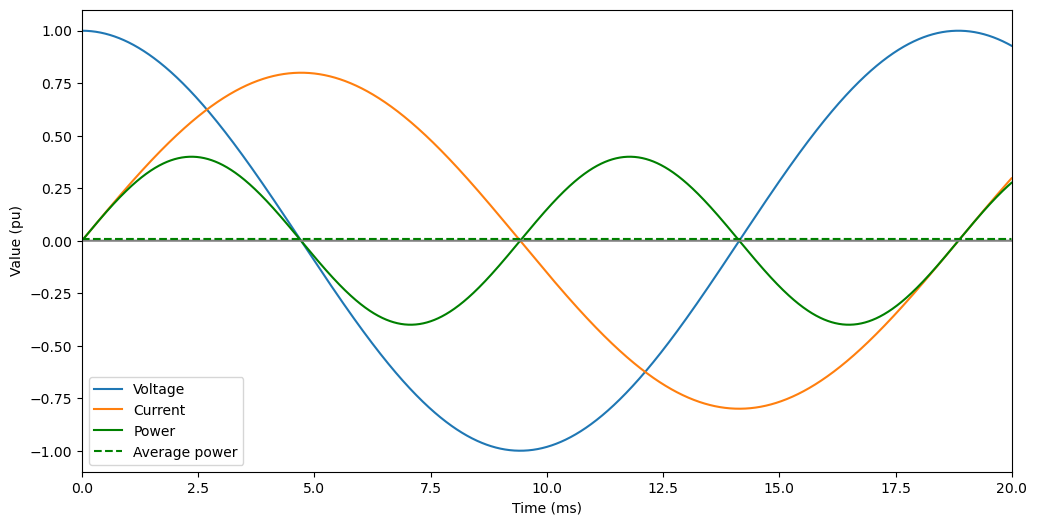

In [224]:
# Make the signal figures




a = 3
lst = np.arange(0,20,0.01)

print(lst)
U = [np.cos(x/a) for x in lst]
I = [0.8*np.cos(x/a-0.5*np.pi) for x in lst]
P = np.array(U)*np.array(I)
P_avg = np.repeat(P.mean(), len(lst))
x = np.zeros(len(lst))


plt.figure(figsize=(12,6))
plt.xlim([0, 20])
plt.plot(lst, U, label = 'Voltage')
plt.plot(lst, I, label = 'Current')
plt.plot(lst, P, label = 'Power', color='green')
plt.plot(lst, x, color='gray')
plt.plot(lst, P_avg,label = 'Average power', color='green', linestyle='dashed')
plt.legend()
plt.xlabel("Time (ms)")
plt.ylabel("Value (pu)")
# plt.savefig('freq2.png')
plt.show()


In [145]:
def transpose_crossval(df):
    col_names = df.columns
    row_names = df.transpose().to_numpy()[0]
    dead_spaces = df.transpose().to_numpy()[-1]
    
    crossval = df.transpose().to_numpy()[1:-1]
    
    new_df = pd.DataFrame(crossval)
    new_df.insert(0, "index", row_names, True)
    new_df.insert(new_df.shape[1], "dead_space", dead_spaces, True)
    new_df.columns = col_names
    
    return new_df
    
    
# Function I made because I fucked up (I originally didn't transpose the crossval matrix)
def fix_my_mistake_and_to_file(file_name):
    df =  feather.read_feather("results/"+file_name)
    df = transpose_crossval(df)
    df.to_feather("results/new_"+file_name)
    
file_name = "xgboost_2_weeks_single_field_crossval_accuracy.feather"
fix_my_mistake_and_to_file(file_name)